In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import json

In [23]:
PATH_FODER_DATA = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data"

In [39]:
PATH_FODER_DATA_TEST = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\test_set"

In [134]:
PATH_DATA = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\training_set\\dogs"
PATH_LABEL = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code"
def data_label_assignment(path_foder_data, path_foder_label_json, label):
    data_path = os.path.join(path_foder_data,'*jpg')
    files = glob.glob(data_path)
    label_all = {}
    with open(path_foder_label_json + "\\" +'label.json') as file_object:
        if(os.path.getsize('label.json') != 0):
            data1 = json.load(file_object)
            items_file = len(data1["data"])
            for i in range(len(files)):
                data = files[i].split('\\')
                data1["data"][data[len(data)-1]] = {'label': label}
            with open(path_foder_label_json + "\\" +'label.json','w') as file_object:
                json.dump(data1, file_object)
            return data1
    with open(path_foder_label_json + "\\" +'label.json','w') as file_object:
        data1 = {}
        for i in range(len(files)):
            data = files[i].split('\\')
            data1[data[len(data)-1]] = {'label': label}
        label_all["data"] = data1 
        json.dump(label_all, file_object)    
        return label_all
data_label_assignment(PATH_DATA, PATH_LABEL, 0)

{'data': {'cat_0.jpg': {'label': 1},
  'cat_1.jpg': {'label': 1},
  'cat_10.jpg': {'label': 1},
  'cat_100.jpg': {'label': 1},
  'cat_101.jpg': {'label': 1},
  'cat_102.jpg': {'label': 1},
  'cat_103.jpg': {'label': 1},
  'cat_104.jpg': {'label': 1},
  'cat_105.jpg': {'label': 1},
  'cat_106.jpg': {'label': 1},
  'cat_107.jpg': {'label': 1},
  'cat_108.jpg': {'label': 1},
  'cat_109.jpg': {'label': 1},
  'cat_11.jpg': {'label': 1},
  'cat_110.jpg': {'label': 1},
  'cat_111.jpg': {'label': 1},
  'cat_112.jpg': {'label': 1},
  'cat_113.jpg': {'label': 1},
  'cat_114.jpg': {'label': 1},
  'cat_115.jpg': {'label': 1},
  'cat_116.jpg': {'label': 1},
  'cat_117.jpg': {'label': 1},
  'cat_118.jpg': {'label': 1},
  'cat_119.jpg': {'label': 1},
  'cat_12.jpg': {'label': 1},
  'cat_120.jpg': {'label': 1},
  'cat_121.jpg': {'label': 1},
  'cat_122.jpg': {'label': 1},
  'cat_123.jpg': {'label': 1},
  'cat_124.jpg': {'label': 1},
  'cat_125.jpg': {'label': 1},
  'cat_126.jpg': {'label': 1},
  'cat_

In [40]:
def rename_image(path_foder):
    for count, filename in enumerate(os.listdir(PATH_FODER_DATA)): 
        src_file =PATH_FODER_DATA + "\\" + filename
        new_file_name ="cat_" + str(count) + ".jpg"
        os.rename(src_file, new_file_name)
    return True
rename_image("C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\test_set\\cats)

In [136]:
def load_label(path_foder_data, path_foder_label_json):
    data_path = os.path.join(path_foder_data,'*jpg')
    files = glob.glob(data_path)
    with open(path_foder_label_json) as file_object:
        label_all = json.load(file_object)
        return label_all

In [145]:
def load_data(path_dir_data, path_dir_data_label , image_widght, image_height, chanel):
    label_all = load_label(path_dir_data, path_dir_data_label)
    data_path = os.path.join(path_dir_data,'*jpg')
    files = glob.glob(data_path)
    number_items = len(files)
    data1 = []
    data = np.zeros((number_items,image_widght,image_height, chanel))
    data_label = np.zeros((1,number_items))
    for i in range(number_items):
        img = cv2.imread(files[i])
        data2 = files[i].split('\\')
        name_image = data2[len(data2)-1]
        data_label[0][i] = label_all["data"][name_image]["label"]
        data1.append(img)
    images = np.asarray(data1)
    for i in range(images.shape[0]):
        data[i]= images[i]/255#khi gan bien kieu numpy cac phan tu se tu dong chuyen sang kieu float ma cac pixel anh o kieu float chi tu 0->1 nen phai chia cho 255 de dam bao cac pixel anh kieu float nam trong [0,1]
    return data, data_label

In [147]:
PATH_DATA = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\training_set\\data_train"
PATH_LABEL = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\label.json"


data_train, data_lable = load_data(PATH_DATA,PATH_LABEL,128,128,3 )

1.0


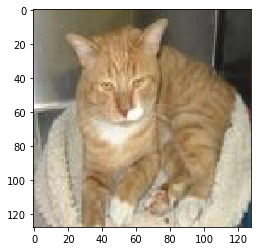

In [152]:
plt.imshow(data_train[9])
print(data_lable[0][9])

In [42]:

def resize_image(path_foder_data, path_foder_data_resize, image_widght, image_height, name):
    data_path = os.path.join(path_foder_data,'*jpg')
    files = glob.glob(data_path)
    for i in range(len(files)):
        img = cv2.imread(files[i])
        data = np.zeros((image_widght, image_height, 3), dtype=np.uint8)
        data = Image.fromarray(img, 'RGB')
        data = data.resize((image_widght,image_height))
        data.save(PATH_FODER_DATA_TRAIN_RESIZE + "\\" + name + "_" + str(i) + ".jpg")

In [45]:
PATH_FODER_DATA_TRAIN = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\test_set\\cats"
PATH_FODER_DATA_TRAIN_RESIZE = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\test_set\\cats_resize"
resize_image(PATH_FODER_DATA_TRAIN, PATH_FODER_DATA_TRAIN_RESIZE,128,128,"dog")

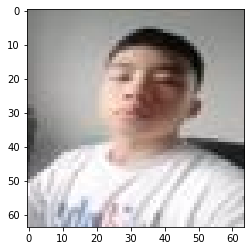

In [56]:
train_x, test_x, train_y, test_y = load_data(PATH_FODER_DATA)

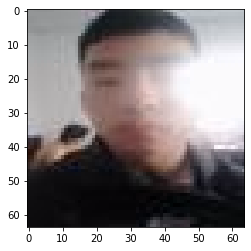

In [57]:
plt.imshow(train_x[9])

In [310]:
"""
Argument:
- quantity_w: so luong trong so
- b : bias

returns:
- vector w shape(quantity_w,0)
- integer b
"""
def init_param(quantity_w,b=0, style ="zeros"):
    
    if(style=="random"):
        w = np.random.randn(quantity_w,1) * 0.01
    else:
        w = np.zeros(shape=(quantity_w,1))
    return w,b
    

In [311]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [312]:
def foward_propagation(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    return A,cost
    

In [313]:
def back_propagation(A,X,Y):
    m = X.shape[1]
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    return dw,db

In [314]:
"""
w shape (quantity_w,1)
X shape (quantity_w,m)
A shape (1,m)
b interger
"""

def model(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    epoch = []
    for i in range(num_iterations):
        A, cost = foward_propagation(w, b, X, Y)
        dw, db = back_propagation(A, X, Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
        epoch.append(i+1)
        print("cost " + str(cost))
    return costs,epoch,w

In [315]:
X = data_train.reshape(data_train.shape[0], -1).T

In [316]:
w, b = init_param(X.shape[0],style = "random")
print(w)

[[ 5.78760512e-05]
 [ 1.07994679e-02]
 [-6.31876817e-03]
 ...
 [ 1.50516854e-02]
 [-3.49669607e-03]
 [ 9.43644572e-03]]


In [317]:
costs, epoch,w = model(w, b, X, data_lable, 15000, 0.001)

cost 0.747181421349698
cost 0.7983852213475785
cost 0.8635678260519845
cost 0.9274975845615935
cost 0.9597848588357943
cost 0.9793418547131789
cost 0.9775154917660941
cost 0.9837166931599054
cost 0.9772080738598018
cost 0.9819143567895178
cost 0.9751746402722067
cost 0.9795713305686313
cost 0.9729613639010185
cost 0.9771646337889551
cost 0.9706996665697859
cost 0.9747380860746899
cost 0.9684067174256811
cost 0.9723001550019809
cost 0.966089590379627
cost 0.9698555446157849
cost 0.9637536552799011
cost 0.9674078746925198
cost 0.9614033963589994
cost 0.9649600472820273
cost 0.9590426037098281
cost 0.9625143989668654
cost 0.9566744917279427
cost 0.9600728113221503
cost 0.9543017931519797
cost 0.9576367985123038
cost 0.9519268362220167
cost 0.9552075775844625
cost 0.9495516084122985
cost 0.9527861250593254
cost 0.9471778092750728
cost 0.9503732225849124
cost 0.9448068944011278
cost 0.947969493829593
cost 0.942440112103816
cost 0.9455754343384081
cost 0.9400785341215427
cost 0.9431914357241

cost 0.6877668327369031
cost 0.6884325897100939
cost 0.6866573988213428
cost 0.6873056013243682
cost 0.6855525623254408
cost 0.6861833554716135
cost 0.6844522879241932
cost 0.6850658170617276
cost 0.68335654059843
cost 0.6839529512757042
cost 0.6822652856330015
cost 0.6828447235648324
cost 0.6811784886149395
cost 0.6817410996498439
cost 0.6800961154315942
cost 0.6806420455200091
cost 0.6790181322687507
cost 0.6795475274321852
cost 0.6779445056087249
cost 0.6784575119098196
cost 0.6768752022284393
cost 0.6773719657419071
cost 0.6758101891974819
cost 0.6762908559819075
cost 0.6747494338761492
cost 0.675214149946621
cost 0.6736929039134711
cost 0.6741418152150276
cost 0.6726405672452251
cost 0.6730738196270878
cost 0.6715923920919347
cost 0.6720101312825112
cost 0.6705483469568575
cost 0.6709507185394908
cost 0.6695084006239617
cost 0.6698955500134056
cost 0.668472522155893
cost 0.6688445945754963
cost 0.6674406808919331
cost 0.6677978213515104
cost 0.666412846445949
cost 0.66675519972032

cost 0.5429454692934267
cost 0.5423660952698566
cost 0.5422968727678459
cost 0.5417174664023842
cost 0.5416497653468066
cost 0.5410703708733107
cost 0.5410041395404507
cost 0.5404248006560967
cost 0.5403599879270177
cost 0.5397807477957165
cost 0.5397173031524418
cost 0.5391382044082477
cost 0.5390760779299557
cost 0.5384971626804693
cost 0.5384363050397073
cost 0.5378576148694703
cost 0.5377979773283865
cost 0.5372195533022703
cost 0.5371610877088624
cost 0.5365829703754482
cost 0.5365256291598322
cost 0.5359478585547828
cost 0.53589159472548
cost 0.5353142103749033
cost 0.5352589775151474
cost 0.5346820184389514
cost 0.5346277707030154
cost 0.5340512754182523
cost 0.5339979675277952
cost 0.5334219740519984
cost 0.5333695612924338
cost 0.5327941071469424
cost 0.5327425453638279
cost 0.5321676675771028
cost 0.53211691317255
cost 0.5315426482834787
cost 0.5314926582125872
cost 0.5309190422737778
cost 0.5308697740410897
cost 0.5302968426221539
cost 0.5302482542781327
cost 0.5296760424689

cost 0.44991889926926976
cost 0.44964261235169417
cost 0.44947819349769674
cost 0.44920409175409554
cost 0.4490390859562924
cost 0.4487671652084358
cost 0.44860159773821107
cost 0.44833185382967705
cost 0.4481657504981932
cost 0.4478981792990715
cost 0.44773156645677814
cost 0.4474661638681984
cost 0.44729906840374767
cost 0.4470358303622021
cost 0.446868279700718
cost 0.4466072021821523
cost 0.4464392242828001
cost 0.44618030330643876
cost 0.44601192665923894
cost 0.4457551582911154
cost 0.4455864119129406
cost 0.44533179226909364
cost 0.44516270569879074
cost 0.444910230948092
cost 0.44474083424066146
cost 0.4444905006072345
cost 0.44432082432700337
cost 0.44407262809219195
cost 0.4439027033049103
cost 0.44365664080875405
cost 0.44348649907254434
cost 0.44324256671471474
cost 0.44307224006980145
cost 0.4428304343099515
cost 0.4426599552670977
cost 0.44242027262457556
cost 0.4422496741521469
cost 0.4420121112050235
cost 0.4418414267146068
cost 0.4416059800979621
cost 0.441435243428457

cost 0.4046236340976356
cost 0.4045353049203833
cost 0.404447021003611
cost 0.40435878229489086
cost 0.4042705887418736
cost 0.40418244029326916
cost 0.4040943368978942
cost 0.4040062785054639
cost 0.4039182650658165
cost 0.4038302965295569
cost 0.40374237284742076
cost 0.4036544939708014
cost 0.40356665985122503
cost 0.40347887044078556
cost 0.4033911256917079
cost 0.40330342555670984
cost 0.4032157699886364
cost 0.4031281589407627
cost 0.40304059236648593
cost 0.40295307021958143
cost 0.40286559245394077
cost 0.40277815902378955
cost 0.4026907698834639
cost 0.40260342498759705
cost 0.4025161242909273
cost 0.40242886774845843
cost 0.4023416553152944
cost 0.40225448694677834
cost 0.4021673625983483
cost 0.40208028222565934
cost 0.4019932457844575
cost 0.4019062532306861
cost 0.4018193045203763
cost 0.4017323996097399
cost 0.40164553845507356
cost 0.4015587210128404
cost 0.40147194723958585
cost 0.4013852170920096
cost 0.4012985305268915
cost 0.40121188750115533
cost 0.4011252879718033


cost 0.37731440725479565
cost 0.377239085448455
cost 0.37716379710681847
cost 0.37708854220284876
cost 0.3770133207095439
cost 0.3769381325999371
cost 0.37686297784709627
cost 0.37678785642412466
cost 0.3767127683041606
cost 0.37663771346037683
cost 0.3765626918659811
cost 0.3764877034942158
cost 0.37641274831835797
cost 0.3763378263117194
cost 0.37626293744764605
cost 0.3761880816995186
cost 0.376113259040752
cost 0.3760384694447954
cost 0.3759637128851324
cost 0.37588898933528053
cost 0.3758142987687917
cost 0.37573964115925146
cost 0.3756650164802797
cost 0.37559042470553
cost 0.3755158658086898
cost 0.37544133976348026
cost 0.3753668465436564
cost 0.3752923861230067
cost 0.3752179584753533
cost 0.37514356357455175
cost 0.3750692013944911
cost 0.374994871909094
cost 0.3749205750923158
cost 0.3748463109181457
cost 0.3747720793606058
cost 0.37469788039375124
cost 0.37462371399167044
cost 0.3745495801284847
cost 0.3744754787783482
cost 0.37440140991544785
cost 0.37432737351400364
cost 

cost 0.3536711249662752
cost 0.3536057416246669
cost 0.3535403842737775
cost 0.35347505289545844
cost 0.35340974747158105
cost 0.35334446798403624
cost 0.3532792144147346
cost 0.3532139867456063
cost 0.35314878495860097
cost 0.3530836090356879
cost 0.3530184589588559
cost 0.35295333471011314
cost 0.35288823627148747
cost 0.35282316362502586
cost 0.35275811675279484
cost 0.35269309563688045
cost 0.3526281002593876
cost 0.35256313060244115
cost 0.3524981866481845
cost 0.35243326837878103
cost 0.3523683757764129
cost 0.35230350882328143
cost 0.3522386675016073
cost 0.35217385179363025
cost 0.35210906168160905
cost 0.35204429714782165
cost 0.35197955817456483
cost 0.3519148447441548
cost 0.35185015683892634
cost 0.3517854944412332
cost 0.35172085753344845
cost 0.3516562460979637
cost 0.35159166011718956
cost 0.35152709957355527
cost 0.35146256444950935
cost 0.35139805472751867
cost 0.3513335703900691
cost 0.35126911141966505
cost 0.3512046777988298
cost 0.3511402695101051
cost 0.3510758865

cost 0.33300313579377205
cost 0.33294559432074583
cost 0.33288807367459095
cost 0.3328305738424093
cost 0.33277309481131495
cost 0.33271563656843417
cost 0.33265819910090566
cost 0.3326007823958799
cost 0.3325433864405198
cost 0.33248601122200017
cost 0.3324286567275084
cost 0.33237132294424343
cost 0.33231400985941684
cost 0.3322567174602518
cost 0.3321994457339838
cost 0.3321421946678605
cost 0.3320849642491413
cost 0.3320277544650978
cost 0.33197056530301366
cost 0.33191339675018416
cost 0.331856248793917
cost 0.33179912142153173
cost 0.33174201462035957
cost 0.331684928377744
cost 0.33162786268104016
cost 0.3315708175176152
cost 0.33151379287484817
cost 0.3314567887401299
cost 0.33139980510086325
cost 0.3313428419444625
cost 0.3312858992583542
cost 0.3312289770299765
cost 0.33117207524677933
cost 0.33111519389622435
cost 0.3310583329657851
cost 0.33100149244294674
cost 0.33094467231520625
cost 0.3308878725700723
cost 0.3308310931950651
cost 0.3307743341777167
cost 0.330717595505570

cost 0.3147151865129242
cost 0.3146640031153354
cost 0.3146128368010862
cost 0.31456168756063496
cost 0.314510555384448
cost 0.3144594402629999
cost 0.31440834218677294
cost 0.3143572611462578
cost 0.31430619713195285
cost 0.31425515013436467
cost 0.31420412014400795
cost 0.31415310715140504
cost 0.3141021111470863
cost 0.3140511321215905
cost 0.31400017006546405
cost 0.3139492249692611
cost 0.313898296823544
cost 0.3138473856188832
cost 0.31379649134585685
cost 0.3137456139950509
cost 0.3136947535570595
cost 0.3136439100224845
cost 0.3135930833819357
cost 0.3135422736260308
cost 0.3134914807453953
cost 0.3134407047306627
cost 0.3133899455724741
cost 0.31333920326147874
cost 0.3132884777883336
cost 0.31323776914370316
cost 0.31318707731826023
cost 0.3131364023026852
cost 0.31308574408766615
cost 0.3130351026638991
cost 0.3129844780220878
cost 0.3129338701529437
cost 0.31288327904718616
cost 0.3128327046955422
cost 0.3127821470887466
cost 0.31273160621754176
cost 0.31268108207267803
cos

cost 0.298423130113971
cost 0.2983771957307493
cost 0.2983312756259168
cost 0.2982853697921863
cost 0.2982394782222761
cost 0.29819360090890995
cost 0.29814773784481724
cost 0.2981018890227331
cost 0.29805605443539784
cost 0.29801023407555755
cost 0.29796442793596367
cost 0.2979186360093732
cost 0.2978728582885488
cost 0.29782709476625835
cost 0.29778134543527557
cost 0.2977356102883794
cost 0.29768988931835433
cost 0.29764418251799035
cost 0.297598489880083
cost 0.29755281139743317
cost 0.2975071470628472
cost 0.297461496869137
cost 0.29741586080911986
cost 0.29737023887561853
cost 0.2973246310614613
cost 0.29727903735948163
cost 0.29723345776251864
cost 0.2971878922634168
cost 0.29714234085502605
cost 0.29709680353020157
cost 0.2970512802818042
cost 0.2970057711027
cost 0.29696027598576047
cost 0.2969147949238626
cost 0.29686932790988835
cost 0.2968238749367257
cost 0.2967784359972676
cost 0.29673301108441236
cost 0.2966876001910637
cost 0.29664220331013097
cost 0.29659682043452834
c

cost 0.2837498139116114
cost 0.2837082989545252
cost 0.2836667961070993
cost 0.28362530536362773
cost 0.2835838267184091
cost 0.2835423601657455
cost 0.2835009056999431
cost 0.28345946331531197
cost 0.28341803300616647
cost 0.2833766147668244
cost 0.28333520859160777
cost 0.2832938144748427
cost 0.2832524324108589
cost 0.2832110623939902
cost 0.2831697044185744
cost 0.28312835847895323
cost 0.28308702456947216
cost 0.2830457026844808
cost 0.28300439281833245
cost 0.2829630949653846
cost 0.2829218091199983
cost 0.282880535276539
cost 0.2828392734293755
cost 0.28279802357288075
cost 0.2827567857014317
cost 0.2827155598094092
cost 0.2826743458911976
cost 0.2826331439411856
cost 0.28259195395376546
cost 0.28255077592333355
cost 0.28250960984428997
cost 0.28246845571103857
cost 0.2824273135179875
cost 0.2823861832595482
cost 0.28234506493013645
cost 0.2823039585241715
cost 0.28226286403607675
cost 0.2822217814602794
cost 0.28218071079121015
cost 0.2821396520233041
cost 0.2820986051509997
co

cost 0.27037303818375363
cost 0.27033531477847106
cost 0.2702976017584343
cost 0.2702598991190896
cost 0.2702222068558862
cost 0.27018452496427614
cost 0.27014685343971434
cost 0.27010919227765867
cost 0.27007154147357
cost 0.27003390102291214
cost 0.2699962709211515
cost 0.2699586511637576
cost 0.26992104174620285
cost 0.26988344266396264
cost 0.26984585391251503
cost 0.269808275487341
cost 0.26977070738392456
cost 0.26973314959775263
cost 0.26969560212431476
cost 0.26965806495910355
cost 0.26962053809761455
cost 0.2695830215353459
cost 0.26954551526779896
cost 0.26950801929047774
cost 0.26947053359888906
cost 0.2694330581885428
cost 0.2693955930549516
cost 0.26935813819363086
cost 0.26932069360009914
cost 0.26928325926987734
cost 0.2692458351984897
cost 0.2692084213814631
cost 0.2691710178143273
cost 0.26913362449261485
cost 0.2690962414118611
cost 0.26905886856760436
cost 0.2690215059553858
cost 0.2689841535707493
cost 0.2689468114092415
cost 0.2689094794664121
cost 0.26887215773781

cost 0.25822088644035274
cost 0.25818642222106614
cost 0.2581519670026864
cost 0.2581175207815137
cost 0.25808308355385057
cost 0.2580486553160019
cost 0.2580142360642746
cost 0.25797982579497775
cost 0.2579454245044228
cost 0.2579110321889231
cost 0.2578766488447944
cost 0.25784227446835467
cost 0.2578079090559238
cost 0.25777355260382423
cost 0.2577392051083803
cost 0.25770486656591857
cost 0.25767053697276776
cost 0.25763621632525896
cost 0.25760190461972526
cost 0.25756760185250177
cost 0.2575333080199262
cost 0.25749902311833806
cost 0.2574647471440791
cost 0.2574304800934933
cost 0.25739622196292666
cost 0.2573619727487277
cost 0.2573277324472466
cost 0.25729350105483606
cost 0.25725927856785086
cost 0.2572250649826477
cost 0.25719086029558574
cost 0.2571566645030262
cost 0.2571224776013324
cost 0.2570882995868698
cost 0.257054130456006
cost 0.25701997020511075
cost 0.256985818830556
cost 0.2569516763287157
cost 0.2569175426959662
cost 0.2568834179286857
cost 0.2568493020232545
c

cost 0.24703050380114672
cost 0.2469988921703985
cost 0.2469672884017039
cost 0.24693569249201688
cost 0.2469041044382932
cost 0.24687252423749018
cost 0.24684095188656685
cost 0.24680938738248392
cost 0.24677783072220386
cost 0.24674628190269057
cost 0.24671474092091009
cost 0.24668320777382974
cost 0.24665168245841865
cost 0.24662016497164763
cost 0.24658865531048918
cost 0.24655715347191742
cost 0.24652565945290814
cost 0.2464941732504389
cost 0.2464626948614889
cost 0.24643122428303876
cost 0.24639976151207119
cost 0.24636830654557032
cost 0.24633685938052197
cost 0.2463054200139136
cost 0.24627398844273432
cost 0.24624256466397498
cost 0.2462111486746283
cost 0.24617974047168803
cost 0.24614834005215017
cost 0.24611694741301213
cost 0.24608556255127303
cost 0.24605418546393362
cost 0.24602281614799634
cost 0.24599145460046518
cost 0.24596010081834593
cost 0.24592875479864584
cost 0.24589741653837405
cost 0.24586608603454116
cost 0.24583476328415943
cost 0.24580344828424283
cost 0.

cost 0.23694982017884325
cost 0.23692066099138714
cost 0.2368915087403476
cost 0.23686236342317596
cost 0.23683322503732512
cost 0.2368040935802491
cost 0.23677496904940348
cost 0.23674585144224505
cost 0.23671674075623175
cost 0.23668763698882303
cost 0.23665854013747975
cost 0.23662945019966392
cost 0.23660036717283897
cost 0.23657129105446947
cost 0.23654222184202156
cost 0.23651315953296248
cost 0.23648410412476092
cost 0.23645505561488686
cost 0.23642601400081165
cost 0.23639697928000777
cost 0.23636795144994918
cost 0.23633893050811103
cost 0.23630991645196991
cost 0.23628090927900366
cost 0.23625190898669143
cost 0.23622291557251354
cost 0.236193929033952
cost 0.23616494936848967
cost 0.23613597657361104
cost 0.23610701064680162
cost 0.23607805158554865
cost 0.23604909938734012
cost 0.2360201540496658
cost 0.23599121557001654
cost 0.23596228394588453
cost 0.2359333591747631
cost 0.23590444125414725
cost 0.23587553018153293
cost 0.23584662595441752
cost 0.23581772857029973
cost 0

cost 0.2275813543002771
cost 0.2275543778699114
cost 0.2275274075932299
cost 0.22750044346808035
cost 0.22747348549231156
cost 0.22744653366377351
cost 0.227419587980317
cost 0.227392648439794
cost 0.2273657150400576
cost 0.22733878777896185
cost 0.2273118666543619
cost 0.22728495166411403
cost 0.2272580428060753
cost 0.22723114007810416
cost 0.2272042434780599
cost 0.2271773530038029
cost 0.22715046865319466
cost 0.2271235904240977
cost 0.22709671831437547
cost 0.22706985232189264
cost 0.22704299244451479
cost 0.22701613868010878
cost 0.22698929102654206
cost 0.22696244948168368
cost 0.22693561404340326
cost 0.2269087847095718
cost 0.2268819614780611
cost 0.22685514434674423
cost 0.22682833331349514
cost 0.22680152837618883
cost 0.22677472953270147
cost 0.22674793678091004
cost 0.22672115011869268
cost 0.2266943695439288
cost 0.22666759505449843
cost 0.22664082664828286
cost 0.22661406432316447
cost 0.2265873080770265
cost 0.22656055790775348
cost 0.22653381381323065
cost 0.2265070757

cost 0.21890071005968093
cost 0.21887567544765546
cost 0.21885064632530735
cost 0.21882562269080236
cost 0.21880060454230735
cost 0.21877559187798967
cost 0.21875058469601785
cost 0.21872558299456107
cost 0.21870058677178952
cost 0.21867559602587403
cost 0.21865061075498646
cost 0.2186256309572994
cost 0.21860065663098655
cost 0.21857568777422198
cost 0.21855072438518117
cost 0.21852576646204
cost 0.21850081400297547
cost 0.21847586700616523
cost 0.21845092546978798
cost 0.21842598939202315
cost 0.21840105877105104
cost 0.21837613360505273
cost 0.2183512138922102
cost 0.21832629963070646
cost 0.21830139081872493
cost 0.21827648745445033
cost 0.2182515895360679
cost 0.21822669706176395
cost 0.21820181002972544
cost 0.21817692843814032
cost 0.21815205228519727
cost 0.21812718156908584
cost 0.21810231628799653
cost 0.21807745644012064
cost 0.21805260202365015
cost 0.21802775303677807
cost 0.21800290947769801
cost 0.21797807134460487
cost 0.21795323863569385
cost 0.21792841134916127
cost 0

cost 0.210810268469094
cost 0.2107869753373324
cost 0.210763687125557
cost 0.2107404038321928
cost 0.21071712545566565
cost 0.21069385199440202
cost 0.21067058344682907
cost 0.21064731981137472
cost 0.2106240610864675
cost 0.2106008072705367
cost 0.21057755836201236
cost 0.21055431435932498
cost 0.21053107526090611
cost 0.2105078410651877
cost 0.21048461177060254
cost 0.21046138737558404
cost 0.2104381678785664
cost 0.2104149532779844
cost 0.21039174357227364
cost 0.21036853875987022
cost 0.21034533883921117
cost 0.2103221438087341
cost 0.21029895366687712
cost 0.21027576841207943
cost 0.21025258804278063
cost 0.2102294125574211
cost 0.2102062419544419
cost 0.21018307623228472
cost 0.21015991538939216
cost 0.21013675942420712
cost 0.21011360833517354
cost 0.21009046212073593
cost 0.21006732077933948
cost 0.21004418430943
cost 0.21002105270945418
cost 0.2099979259778591
cost 0.20997480411309286
cost 0.20995168711360399
cost 0.20992857497784181
cost 0.2099054677042563
cost 0.209882365291

cost 0.20329461804904161
cost 0.20327288471259114
cost 0.2032511558065985
cost 0.20322943132970117
cost 0.2032077112805372
cost 0.20318599565774523
cost 0.20316428445996448
cost 0.2031425776858348
cost 0.20312087533399653
cost 0.20309917740309055
cost 0.20307748389175853
cost 0.20305579479864247
cost 0.20303411012238506
cost 0.20301242986162957
cost 0.20299075401501984
cost 0.20296908258120025
cost 0.20294741555881574
cost 0.20292575294651188
cost 0.20290409474293483
cost 0.20288244094673125
cost 0.20286079155654838
cost 0.2028391465710341
cost 0.2028175059888368
cost 0.20279586980860542
cost 0.2027742380289896
cost 0.2027526106486394
cost 0.2027309876662055
cost 0.20270936908033918
cost 0.20268775488969235
cost 0.20266614509291728
cost 0.202644539688667
cost 0.20262293867559508
cost 0.2026013420523556
cost 0.20257974981760324
cost 0.20255816196999324
cost 0.20253657850818138
cost 0.20251499943082413
cost 0.2024934247365783
cost 0.20247185442410157
cost 0.20245028849205196
cost 0.20242

cost 0.1962536383648207
cost 0.19623331643417308
cost 0.19621299850796628
cost 0.19619268458501465
cost 0.1961723746641328
cost 0.1961520687441361
cost 0.19613176682384023
cost 0.19611146890206146
cost 0.1960911749776165
cost 0.1960708850493224
cost 0.19605059911599693
cost 0.1960303171764582
cost 0.19601003922952479
cost 0.19598976527401576
cost 0.1959694953087508
cost 0.19594922933254993
cost 0.1959289673442336
cost 0.19590870934262286
cost 0.19588845532653917
cost 0.1958682052948046
cost 0.19584795924624146
cost 0.19582771717967262
cost 0.19580747909392168
cost 0.1957872449878124
cost 0.19576701486016904
cost 0.19574678870981657
cost 0.19572656653558018
cost 0.1957063483362857
cost 0.19568613411075933
cost 0.19566592385782788
cost 0.19564571757631846
cost 0.1956255152650588
cost 0.19560531692287703
cost 0.19558512254860172
cost 0.19556493214106208
cost 0.19554474569908759
cost 0.19552456322150832
cost 0.1955043847071548
cost 0.19548421015485792
cost 0.1954640395634493
cost 0.1954438

cost 0.1896817441747228
cost 0.1896626966269532
cost 0.1896436527128799
cost 0.1896246124314648
cost 0.1896055757816701
cost 0.18958654276245854
cost 0.18956751337279312
cost 0.18954848761163742
cost 0.1895294654779553
cost 0.189510446970711
cost 0.1894914320888693
cost 0.18947242083139523
cost 0.1894534131972543
cost 0.18943440918541238
cost 0.1894154087948359
cost 0.18939641202449148
cost 0.18937741887334622
cost 0.18935842934036767
cost 0.18933944342452375
cost 0.18932046112478276
cost 0.1893014824401134
cost 0.18928250736948485
cost 0.1892635359118666
cost 0.18924456806622858
cost 0.18922560383154113
cost 0.18920664320677488
cost 0.18918768619090107
cost 0.1891687327828912
cost 0.18914978298171714
cost 0.18913083678635134
cost 0.18911189419576635
cost 0.18909295520893543
cost 0.18907401982483202
cost 0.18905508804243012
cost 0.189036159860704
cost 0.18901723527862838
cost 0.18899831429517838
cost 0.18897939690932952
cost 0.1889604831200577
cost 0.1889415729263393
cost 0.18892266632

cost 0.18349785800363994
cost 0.18347997207822123
cost 0.18346208946016232
cost 0.18344421014854992
cost 0.18342633414247117
cost 0.1834084614410135
cost 0.18339059204326477
cost 0.18337272594831303
cost 0.18335486315524682
cost 0.1833370036631549
cost 0.18331914747112651
cost 0.18330129457825114
cost 0.18328344498361862
cost 0.18326559868631914
cost 0.1832477556854432
cost 0.18322991598008173
cost 0.18321207956932595
cost 0.18319424645226734
cost 0.18317641662799788
cost 0.1831585900956097
cost 0.18314076685419547
cost 0.1831229469028481
cost 0.18310513024066075
cost 0.18308731686672716
cost 0.1830695067801411
cost 0.18305169997999696
cost 0.18303389646538928
cost 0.183016096235413
cost 0.18299829928916359
cost 0.18298050562573645
cost 0.1829627152442277
cost 0.1829449281437335
cost 0.1829271443233506
cost 0.18290936378217598
cost 0.18289158651930698
cost 0.18287381253384113
cost 0.18285604182487655
cost 0.18283827439151154
cost 0.18282051023284476
cost 0.1828027493479752
cost 0.18278

cost 0.17770243338441088
cost 0.1776856033597416
cost 0.17766877635550185
cost 0.1776519523708843
cost 0.17763513140508175
cost 0.17761831345728743
cost 0.17760149852669477
cost 0.17758468661249766
cost 0.17756787771389
cost 0.17755107183006621
cost 0.17753426896022093
cost 0.17751746910354912
cost 0.17750067225924598
cost 0.17748387842650704
cost 0.17746708760452803
cost 0.1774502997925052
cost 0.1774335149896348
cost 0.1774167331951136
cost 0.17739995440813852
cost 0.17738317862790676
cost 0.17736640585361604
cost 0.17734963608446402
cost 0.17733286931964898
cost 0.17731610555836924
cost 0.17729934479982354
cost 0.1772825870432109
cost 0.17726583228773057
cost 0.17724908053258215
cost 0.17723233177696554
cost 0.17721558602008083
cost 0.17719884326112847
cost 0.17718210349930927
cost 0.1771653667338242
cost 0.17714863296387456
cost 0.17713190218866195
cost 0.17711517440738833
cost 0.1770984496192558
cost 0.17708172782346684
cost 0.17706500901922417
cost 0.1770482932057309
cost 0.17703

cost 0.17227608677873676
cost 0.17226021687514387
cost 0.17224434973920263
cost 0.17222848537019556
cost 0.17221262376740556
cost 0.17219676493011582
cost 0.1721809088576097
cost 0.17216505554917086
cost 0.17214920500408312
cost 0.1721333572216307
cost 0.17211751220109792
cost 0.1721016699417695
cost 0.17208583044293022
cost 0.1720699937038653
cost 0.17205415972386007
cost 0.17203832850220027
cost 0.1720225000381717
cost 0.17200667433106054
cost 0.17199085138015313
cost 0.17197503118473617
cost 0.17195921374409648
cost 0.1719433990575212
cost 0.1719275871242978
cost 0.17191177794371384
cost 0.1718959715150572
cost 0.1718801678376161
cost 0.17186436691067877
cost 0.171848568733534
cost 0.17183277330547048
cost 0.17181698062577752
cost 0.17180119069374442
cost 0.17178540350866078
cost 0.17176961906981653
cost 0.17175383737650174
cost 0.17173805842800677
cost 0.17172228222362224
cost 0.17170650876263904
cost 0.17169073804434828
cost 0.17167497006804128
cost 0.17165920483300962
cost 0.1716

cost 0.16712516018814902
cost 0.16711017627686153
cost 0.1670951949069276
cost 0.16708021607770782
cost 0.16706523978856297
cost 0.16705026603885414
cost 0.16703529482794258
cost 0.16702032615518975
cost 0.16700536001995736
cost 0.16699039642160732
cost 0.16697543535950168
cost 0.1669604768330028
cost 0.16694552084147335
cost 0.16693056738427597
cost 0.16691561646077366
cost 0.1669006680703297
cost 0.1668857222123074
cost 0.16687077888607046
cost 0.1668558380909827
cost 0.1668408998264082
cost 0.16682596409171127
cost 0.16681103088625632
cost 0.16679610020940813
cost 0.1667811720605316
cost 0.1667662464389918
cost 0.16675132334415418
cost 0.16673640277538432
cost 0.16672148473204787
cost 0.16670656921351099
cost 0.16669165621913978
cost 0.1666767457483007
cost 0.16666183780036037
cost 0.1666469323746857
cost 0.16663202947064365
cost 0.16661712908760157
cost 0.16660223122492698
cost 0.16658733588198754
cost 0.1665724430581512
cost 0.1665575527527861
cost 0.16654266496526055
cost 0.16652

cost 0.16228637907274301
cost 0.1622722050233864
cost 0.1622580333144681
cost 0.16224386394541573
cost 0.16222969691565714
cost 0.16221553222462043
cost 0.1622013698717338
cost 0.1621872098564258
cost 0.16217305217812486
cost 0.16215889683625986
cost 0.1621447438302599
cost 0.1621305931595541
cost 0.16211644482357174
cost 0.1621022988217425
cost 0.16208815515349603
cost 0.1620740138182623
cost 0.16205987481547152
cost 0.16204573814455386
cost 0.16203160380493983
cost 0.16201747179606021
cost 0.16200334211734574
cost 0.1619892147682276
cost 0.16197508974813693
cost 0.16196096705650515
cost 0.161946846692764
cost 0.16193272865634517
cost 0.1619186129466807
cost 0.16190449956320266
cost 0.1618903885053435
cost 0.1618762797725358
cost 0.16186217336421224
cost 0.1618480692798057
cost 0.16183396751874937
cost 0.16181986808047646
cost 0.1618057709644205
cost 0.1617916761700151
cost 0.16177758369669415
cost 0.16176349354389166
cost 0.16174940571104185
cost 0.1617353201975791
cost 0.16172123700

cost 0.15766554864370483
cost 0.15765212775150142
cost 0.15763870901806287
cost 0.1576252924428756
cost 0.15761187802542628
cost 0.15759846576520187
cost 0.15758505566168932
cost 0.15757164771437573
cost 0.1575582419227486
cost 0.1575448382862953
cost 0.1575314368045036
cost 0.15751803747686122
cost 0.1575046403028563
cost 0.1574912452819768
cost 0.15747785241371123
cost 0.15746446169754802
cost 0.1574510731329757
cost 0.15743768671948333
cost 0.15742430245655964
cost 0.15741092034369386
cost 0.15739754038037526
cost 0.15738416256609336
cost 0.15737078690033776
cost 0.15735741338259823
cost 0.15734404201236468
cost 0.15733067278912732
cost 0.15731730571237634
cost 0.15730394078160226
cost 0.1572905779962956
cost 0.1572772173559471
cost 0.1572638588600478
cost 0.15725050250808864
cost 0.15723714829956095
cost 0.15722379623395616
cost 0.15721044631076578
cost 0.15719709852948158
cost 0.1571837528895954
cost 0.15717040939059945
cost 0.15715706803198576
cost 0.15714372881324679
cost 0.1571

cost 0.15328721543893747
cost 0.1532744899905744
cost 0.15326176653772963
cost 0.15324904507994103
cost 0.15323632561674663
cost 0.15322360814768468
cost 0.15321089267229346
cost 0.15319817919011133
cost 0.15318546770067695
cost 0.153172758203529
cost 0.15316005069820657
cost 0.15314734518424838
cost 0.15313464166119384
cost 0.15312194012858213
cost 0.1531092405859527
cost 0.15309654303284523
cost 0.15308384746879938
cost 0.15307115389335507
cost 0.15305846230605233
cost 0.15304577270643133
cost 0.15303308509403227
cost 0.1530203994683957
cost 0.15300771582906228
cost 0.1529950341755726
cost 0.1529823545074676
cost 0.15296967682428825
cost 0.15295700112557584
cost 0.1529443274108715
cost 0.15293165567971684
cost 0.15291898593165337
cost 0.15290631816622277
cost 0.15289365238296693
cost 0.15288098858142793
cost 0.1528683267611479
cost 0.15285566692166908
cost 0.15284300906253392
cost 0.1528303531832851
cost 0.15281769928346517
cost 0.1528050473626171
cost 0.15279239742028392
cost 0.1527

cost 0.14915720119731163
cost 0.14914511555785573
cost 0.14913303176762185
cost 0.1491209498261928
cost 0.14910886973315127
cost 0.14909679148808017
cost 0.1490847150905625
cost 0.1490726405401814
cost 0.1490605678365202
cost 0.14904849697916217
cost 0.1490364279676909
cost 0.14902436080169
cost 0.14901229548074332
cost 0.14900023200443463
cost 0.14898817037234802
cost 0.14897611058406773
cost 0.14896405263917775
cost 0.14895199653726282
cost 0.14893994227790722
cost 0.14892788986069566
cost 0.14891583928521293
cost 0.14890379055104394
cost 0.14889174365777366
cost 0.14887969860498726
cost 0.14886765539227004
cost 0.14885561401920736
cost 0.1488435744853847
cost 0.14883153679038777
cost 0.14881950093380236
cost 0.14880746691521435
cost 0.1487954347342097
cost 0.1487834043903746
cost 0.14877137588329528
cost 0.14875934921255823
cost 0.14874732437774987
cost 0.1487353013784569
cost 0.14872328021426603
cost 0.1487112608847642
cost 0.14869924338953838
cost 0.14868722772817577
cost 0.148675

cost 0.1452439147599318
cost 0.1452324208676916
cost 0.1452209286927482
cost 0.14520943823472357
cost 0.14519794949323966
cost 0.1451864624679187
cost 0.14517497715838296
cost 0.14516349356425481
cost 0.14515201168515665
cost 0.14514053152071119
cost 0.14512905307054108
cost 0.1451175763342692
cost 0.14510610131151838
cost 0.14509462800191175
cost 0.14508315640507244
cost 0.14507168652062366
cost 0.14506021834818889
cost 0.1450487518873915
cost 0.14503728713785513
cost 0.1450258240992035
cost 0.14501436277106045
cost 0.1450029031530498
cost 0.14499144524479568
cost 0.14497998904592224
cost 0.14496853455605369
cost 0.1449570817748144
cost 0.1449456307018289
cost 0.1449341813367217
cost 0.14492273367911757
cost 0.1449112877286413
cost 0.14489984348491775
cost 0.144888400947572
cost 0.14487696011622922
cost 0.14486552099051453
cost 0.14485408357005347
cost 0.14484264785447135
cost 0.1448312138433938
cost 0.14481978153644653
cost 0.14480835093325534
cost 0.14479692203344613
cost 0.14478549

cost 0.14150912611592772
cost 0.1414981838422359
cost 0.14148724316584407
cost 0.14147630408640907
cost 0.14146536660358777
cost 0.14145443071703706
cost 0.14144349642641407
cost 0.14143256373137592
cost 0.14142163263157978
cost 0.14141070312668316
cost 0.14139977521634345
cost 0.14138884890021813
cost 0.1413779241779649
cost 0.1413670010492416
cost 0.1413560795137059
cost 0.14134515957101587
cost 0.1413342412208295
cost 0.14132332446280488
cost 0.14131240929660033
cost 0.14130149572187417
cost 0.14129058373828476
cost 0.1412796733454907
cost 0.14126876454315057
cost 0.1412578573309231
cost 0.14124695170846716
cost 0.14123604767544162
cost 0.1412251452315055
cost 0.14121424437631794
cost 0.1412033451095381
cost 0.14119244743082535
cost 0.14118155133983903
cost 0.1411706568362387
cost 0.14115976391968393
cost 0.1411488725898345
cost 0.1411379828463501
cost 0.14112709468889062
cost 0.14111620811711614
cost 0.14110532313068666
cost 0.1410944397292624
cost 0.14108355791250365
cost 0.141072

cost 0.1379620297145361
cost 0.13795159946222887
cost 0.13794117069846376
cost 0.13793074342292821
cost 0.13792031763531
cost 0.1379098933352967
cost 0.13789947052257626
cost 0.1378890491968365
cost 0.13787862935776546
cost 0.13786821100505117
cost 0.13785779413838178
cost 0.13784737875744565
cost 0.137836964861931
cost 0.1378265524515263
cost 0.13781614152592006
cost 0.13780573208480087
cost 0.1377953241278575
cost 0.13778491765477863
cost 0.1377745126652531
cost 0.13776410915896992
cost 0.1377537071356181
cost 0.13774330659488673
cost 0.13773290753646508
cost 0.13772250996004246
cost 0.13771211386530818
cost 0.13770171925195174
cost 0.13769132611966264
cost 0.1376809344681306
cost 0.13767054429704537
cost 0.13766015560609665
cost 0.13764976839497448
cost 0.1376393826633687
cost 0.13762899841096948
cost 0.1376186156374669
cost 0.13760823434255134
cost 0.13759785452591305
cost 0.1375874761872424
cost 0.13757709932623002
cost 0.13756672394256644
cost 0.1375563500359423
cost 0.1375459776

cost 0.13455922534901718
cost 0.13454927541667544
cost 0.1345393268731939
cost 0.1345293797182875
cost 0.13451943395167149
cost 0.13450948957306116
cost 0.13449954658217175
cost 0.13448960497871867
cost 0.13447966476241752
cost 0.13446972593298376
cost 0.13445978849013307
cost 0.13444985243358115
cost 0.13443991776304381
cost 0.13442998447823692
cost 0.13442005257887646
cost 0.13441012206467837
cost 0.13440019293535888
cost 0.1343902651906341
cost 0.13438033883022027
cost 0.13437041385383383
cost 0.1343604902611911
cost 0.1343505680520086
cost 0.13434064722600295
cost 0.1343307277828907
cost 0.13432080972238863
cost 0.1343108930442136
cost 0.13430097774808242
cost 0.13429106383371203
cost 0.13428115130081952
cost 0.13427124014912192
cost 0.1342613303783365
cost 0.13425142198818057
cost 0.13424151497837133
cost 0.13423160934862627
cost 0.13422170509866296
cost 0.13421180222819887
cost 0.13420190073695165
cost 0.13419200062463912
cost 0.13418210189097898
cost 0.1341722045356892
cost 0.13

cost 0.13132097193735182
cost 0.13131146920787126
cost 0.13130196777652017
cost 0.13129246764303806
cost 0.13128296880716459
cost 0.13127347126863956
cost 0.13126397502720266
cost 0.13125448008259383
cost 0.13124498643455298
cost 0.1312354940828201
cost 0.13122600302713525
cost 0.1312165132672386
cost 0.13120702480287036
cost 0.13119753763377076
cost 0.13118805175968018
cost 0.13117856718033907
cost 0.1311690838954879
cost 0.13115960190486717
cost 0.13115012120821756
cost 0.13114064180527976
cost 0.1311311636957945
cost 0.13112168687950262
cost 0.1311122113561451
cost 0.13110273712546283
cost 0.13109326418719686
cost 0.1310837925410883
cost 0.13107432218687834
cost 0.13106485312430816
cost 0.13105538535311922
cost 0.13104591887305275
cost 0.1310364536838503
cost 0.13102698978525334
cost 0.13101752717700352
cost 0.13100806585884245
cost 0.13099860583051184
cost 0.13098914709175352
cost 0.13097968964230935
cost 0.13097023348192127
cost 0.13096077861033126
cost 0.13095132502728143
cost 0.

cost 0.12823585259457054
cost 0.1282267669438611
cost 0.12821768250850377
cost 0.12820859928826
cost 0.1281995172828913
cost 0.12819043649215922
cost 0.12818135691582533
cost 0.12817227855365126
cost 0.12816320140539883
cost 0.12815412547082983
cost 0.128145050749706
cost 0.1281359772417894
cost 0.12812690494684195
cost 0.1281178338646257
cost 0.12810876399490276
cost 0.12809969533743526
cost 0.1280906278919855
cost 0.12808156165831572
cost 0.12807249663618828
cost 0.1280634328253656
cost 0.12805437022561011
cost 0.12804530883668447
cost 0.12803624865835114
cost 0.12802718969037288
cost 0.12801813193251235
cost 0.12800907538453238
cost 0.12800002004619582
cost 0.1279909659172656
cost 0.12798191299750458
cost 0.1279728612866759
cost 0.1279638107845426
cost 0.1279547614908679
cost 0.12794571340541497
cost 0.12793666652794705
cost 0.1279276208582275
cost 0.1279185763960198
cost 0.12790953314108736
cost 0.12790049109319374
cost 0.12789145025210247
cost 0.1278824106175772
cost 0.12787337218

cost 0.12526739494386857
cost 0.1252587023260117
cost 0.12525001084716048
cost 0.12524132050709622
cost 0.12523263130560003
cost 0.1252239432424531
cost 0.1252152563174367
cost 0.1252065705303323
cost 0.12519788588092112
cost 0.12518920236898473
cost 0.12518051999430463
cost 0.12517183875666235
cost 0.12516315865583952
cost 0.12515447969161783
cost 0.125145801863779
cost 0.1251371251721048
cost 0.12512844961637706
cost 0.1251197751963778
cost 0.12511110191188882
cost 0.1251024297626922
cost 0.12509375874857
cost 0.1250850888693044
cost 0.12507642012467743
cost 0.12506775251447144
cost 0.1250590860384687
cost 0.12505042069645153
cost 0.1250417564882023
cost 0.1250330934135035
cost 0.12502443147213763
cost 0.12501577066388733
cost 0.12500711098853512
cost 0.12499845244586369
cost 0.12498979503565574
cost 0.1249811387576942
cost 0.12497248361176172
cost 0.12496382959764137
cost 0.12495517671511601
cost 0.12494652496396859
cost 0.12493787434398229
cost 0.12492922485494017
cost 0.1249205764

cost 0.12245106111552669
cost 0.12244273388024142
cost 0.12243440771445796
cost 0.12242608261797502
cost 0.12241775859059137
cost 0.12240943563210574
cost 0.12240111374231687
cost 0.12239279292102377
cost 0.12238447316802521
cost 0.12237615448312031
cost 0.12236783686610796
cost 0.12235952031678726
cost 0.1223512048349574
cost 0.12234289042041743
cost 0.12233457707296663
cost 0.12232626479240429
cost 0.12231795357852968
cost 0.12230964343114217
cost 0.12230133435004122
cost 0.12229302633502628
cost 0.12228471938589683
cost 0.12227641350245251
cost 0.12226810868449282
cost 0.12225980493181757
cost 0.1222515022442264
cost 0.1222432006215191
cost 0.12223490006349547
cost 0.12222660056995535
cost 0.12221830214069872
cost 0.12221000477552552
cost 0.12220170847423575
cost 0.12219341323662951
cost 0.12218511906250688
cost 0.12217682595166807
cost 0.12216853390391325
cost 0.12216024291904272
cost 0.12215195299685676
cost 0.12214366413715581
cost 0.12213537633974021
cost 0.12212708960441049
cos

cost 0.11975197539612528
cost 0.11974399146366926
cost 0.11973600853672789
cost 0.11972802661511575
cost 0.11972004569864733
cost 0.1197120657871372
cost 0.11970408688039999
cost 0.11969610897825034
cost 0.11968813208050302
cost 0.11968015618697266
cost 0.11967218129747423
cost 0.11966420741182249
cost 0.11965623452983223
cost 0.11964826265131857
cost 0.11964029177609642
cost 0.11963232190398077
cost 0.11962435303478666
cost 0.11961638516832936
cost 0.11960841830442387
cost 0.11960045244288547
cost 0.11959248758352943
cost 0.11958452372617097
cost 0.11957656087062554
cost 0.1195685990167084
cost 0.11956063816423514
cost 0.1195526783130211
cost 0.11954471946288185
cost 0.11953676161363301
cost 0.11952880476509015
cost 0.11952084891706889
cost 0.11951289406938498
cost 0.11950494022185415
cost 0.11949698737429222
cost 0.11948903552651496
cost 0.11948108467833835
cost 0.11947313482957828
cost 0.11946518598005067
cost 0.11945723812957161
cost 0.11944929127795709
cost 0.11944134542502334
cos

cost 0.1171554596696871
cost 0.11714779964221282
cost 0.11714014056107341
cost 0.11713248242609758
cost 0.11712482523711427
cost 0.11711716899395237
cost 0.11710951369644075
cost 0.11710185934440849
cost 0.11709420593768452
cost 0.11708655347609792
cost 0.11707890195947784
cost 0.11707125138765336
cost 0.1170636017604537
cost 0.11705595307770808
cost 0.11704830533924579
cost 0.11704065854489606
cost 0.1170330126944883
cost 0.11702536778785186
cost 0.11701772382481622
cost 0.1170100808052108
cost 0.11700243872886514
cost 0.11699479759560877
cost 0.11698715740527128
cost 0.11697951815768233
cost 0.1169718798526716
cost 0.1169642424900687
cost 0.11695660606970355
cost 0.11694897059140578
cost 0.1169413360550054
cost 0.11693370246033212
cost 0.11692606980721595
cost 0.11691843809548687
cost 0.11691080732497482
cost 0.11690317749550985
cost 0.11689554860692203
cost 0.11688792065904154
cost 0.11688029365169847
cost 0.11687266758472306
cost 0.11686504245794557
cost 0.11685741827119624
cost 0.

cost 0.11466331320746151
cost 0.11465595819918065
cost 0.11464860408258304
cost 0.11464125085751051
cost 0.11463389852380483
cost 0.1146265470813079
cost 0.11461919652986159
cost 0.11461184686930784
cost 0.11460449809948862
cost 0.11459715022024597
cost 0.11458980323142186
cost 0.11458245713285846
cost 0.11457511192439783
cost 0.11456776760588215
cost 0.11456042417715362
cost 0.11455308163805442
cost 0.1145457399884269
cost 0.11453839922811329
cost 0.11453105935695597
cost 0.11452372037479734
cost 0.11451638228147976
cost 0.1145090450768457
cost 0.11450170876073766
cost 0.11449437333299818
cost 0.11448703879346983
cost 0.11447970514199514
cost 0.11447237237841684
cost 0.11446504050257754
cost 0.11445770951431997
cost 0.11445037941348686
cost 0.11444305019992106
cost 0.11443572187346533
cost 0.11442839443396254
cost 0.11442106788125557
cost 0.11441374221518744
cost 0.11440641743560098
cost 0.11439909354233933
cost 0.11439177053524544
cost 0.11438444841416243
cost 0.11437712717893336
cos

cost 0.11226243931327783
cost 0.11225537271106528
cost 0.11224830694984053
cost 0.11224124202945711
cost 0.11223417794976868
cost 0.11222711471062885
cost 0.11222005231189135
cost 0.1122129907534098
cost 0.11220593003503807
cost 0.11219887015662987
cost 0.11219181111803904
cost 0.11218475291911939
cost 0.11217769555972491
cost 0.11217063903970939
cost 0.11216358335892689
cost 0.11215652851723139
cost 0.11214947451447681
cost 0.1121424213505173
cost 0.11213536902520688
cost 0.11212831753839969
cost 0.11212126688994996
cost 0.1121142170797118
cost 0.11210716810753941
cost 0.1121001199732871
cost 0.11209307267680918
cost 0.11208602621795988
cost 0.1120789805965936
cost 0.11207193581256476
cost 0.1120648918657278
cost 0.11205784875593713
cost 0.11205080648304716
cost 0.11204376504691259
cost 0.11203672444738781
cost 0.11202968468432754
cost 0.11202264575758634
cost 0.11201560766701885
cost 0.11200857041247979
cost 0.1120015339938239
cost 0.11199449841090592
cost 0.11198746366358062
cost 0.

cost 0.10997526065658153
cost 0.10996846382764448
cost 0.10996166779315254
cost 0.10995487255296979
cost 0.10994807810696056
cost 0.10994128445498905
cost 0.10993449159691959
cost 0.10992769953261648
cost 0.10992090826194414
cost 0.10991411778476692
cost 0.10990732810094922
cost 0.10990053921035554
cost 0.10989375111285027
cost 0.10988696380829811
cost 0.1098801772965634
cost 0.10987339157751083
cost 0.10986660665100495
cost 0.10985982251691044
cost 0.10985303917509195
cost 0.10984625662541413
cost 0.10983947486774176
cost 0.10983269390193956
cost 0.10982591372787241
cost 0.10981913434540502
cost 0.10981235575440229
cost 0.10980557795472908
cost 0.10979880094625029
cost 0.10979202472883089
cost 0.10978524930233585
cost 0.10977847466663015
cost 0.10977170082157885
cost 0.10976492776704698
cost 0.10975815550289966
cost 0.109751384029002
cost 0.10974461334521915
cost 0.10973784345141627
cost 0.10973107434745864
cost 0.10972430603321148
cost 0.10971753850854006
cost 0.10971077177330965
cos

cost 0.1077746422235027
cost 0.1077681003679436
cost 0.10776155926363397
cost 0.10775501891044764
cost 0.1077484793082586
cost 0.10774194045694077
cost 0.10773540235636811
cost 0.10772886500641453
cost 0.10772232840695421
cost 0.10771579255786111
cost 0.1077092574590093
cost 0.1077027231102729
cost 0.10769618951152604
cost 0.10768965666264294
cost 0.10768312456349771
cost 0.10767659321396457
cost 0.10767006261391783
cost 0.10766353276323173
cost 0.10765700366178058
cost 0.10765047530943866
cost 0.10764394770608038
cost 0.10763742085158015
cost 0.10763089474581229
cost 0.10762436938865137
cost 0.10761784477997173
cost 0.10761132091964792
cost 0.10760479780755457
cost 0.10759827544356602
cost 0.10759175382755697
cost 0.10758523295940202
cost 0.1075787128389758
cost 0.10757219346615304
cost 0.10756567484080831
cost 0.10755915696281643
cost 0.10755263983205207
cost 0.10754612344839007
cost 0.10753960781170518
cost 0.10753309292187224
cost 0.1075265787787661
cost 0.10752006538226169
cost 0.

cost 0.10565587627849077
cost 0.1056495756514049
cost 0.1056432757354243
cost 0.10563697653043166
cost 0.10563067803630968
cost 0.10562438025294112
cost 0.10561808318020884
cost 0.10561178681799555
cost 0.10560549116618415
cost 0.10559919622465752
cost 0.10559290199329856
cost 0.10558660847199008
cost 0.10558031566061517
cost 0.10557402355905668
cost 0.10556773216719766
cost 0.10556144148492115
cost 0.10555515151211012
cost 0.10554886224864773
cost 0.10554257369441696
cost 0.10553628584930105
cost 0.10552999871318304
cost 0.10552371228594618
cost 0.10551742656747368
cost 0.10551114155764867
cost 0.10550485725635446
cost 0.1054985736634743
cost 0.1054922907788915
cost 0.10548600860248938
cost 0.10547972713415131
cost 0.10547344637376062
cost 0.10546716632120075
cost 0.10546088697635511
cost 0.10545460833910712
cost 0.10544833040934036
cost 0.10544205318693821
cost 0.1054357766717842
cost 0.10542950086376202
cost 0.10542322576275508
cost 0.1054169513686471
cost 0.10541067768132163
cost 0

cost 0.10360244406165262
cost 0.10359637322809356
cost 0.10359030306806355
cost 0.10358423358145338
cost 0.10357816476815399
cost 0.10357209662805614
cost 0.1035660291610508
cost 0.10355996236702887
cost 0.10355389624588134
cost 0.10354783079749909
cost 0.10354176602177323
cost 0.10353570191859465
cost 0.10352963848785443
cost 0.10352357572944369
cost 0.10351751364325344
cost 0.10351145222917486
cost 0.10350539148709903
cost 0.10349933141691711
cost 0.10349327201852032
cost 0.10348721329179983
cost 0.10348115523664682
cost 0.1034750978529526
cost 0.10346904114060841
cost 0.1034629850995056
cost 0.10345692972953544
cost 0.10345087503058924
cost 0.10344482100255843
cost 0.10343876764533436
cost 0.10343271495880846
cost 0.10342666294287213
cost 0.10342061159741688
cost 0.10341456092233416
cost 0.10340851091751546
cost 0.10340246158285234
cost 0.10339641291823633
cost 0.10339036492355899
cost 0.10338431759871194
cost 0.10337827094358681
cost 0.1033722249580752
cost 0.10336617964206882
cost

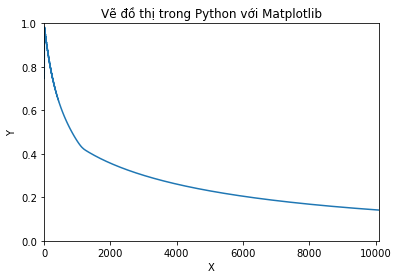

In [318]:
plt.plot(epoch,costs, label='Python')
plt.title('giá trị cost qua các vòng lặp')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0,1)
plt.xlim(0,10100)
plt.show()

In [285]:
def predect(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    label_predict = np.zeros((1,A.shape[1]))
    for i in range(A.shape[1]):
    if(A[0][i] > 0.5):
        label_predict[0][i] = 1
    elif(A[0][i] == 0.5):
        label_predict[0][i] = 0.5
    else:
        label_predict[0][i] = 0
    return label_predict

In [324]:
PATH_TEST_CATS= "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\test_set\\cats"
PATH_TEST_DOGS = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\data\\test_set\\dogs"
def load_image_test(path_dir_data, image_widght, image_height, chanel):
    data_path = os.path.join(path_dir_data,'*jpg')
    files = glob.glob(data_path)
    number_items = len(files)
    data1 = []
    data = np.zeros((number_items,image_widght,image_height, chanel))
    for i in range(number_items):
        img = cv2.imread(files[i])
        data2 = files[i].split('\\')
        data1.append(img)
    images = np.asarray(data1)
    for i in range(images.shape[0]):
        data[i]= images[i]/255#khi gan bien kieu numpy cac phan tu se tu dong chuyen sang kieu float ma cac pixel anh o kieu float chi tu 0->1 nen phai chia cho 255 de dam bao cac pixel anh kieu float nam trong [0,1]
    return data
TEST = load_image_test(PATH_TEST_DOGS,128,128,3)

In [325]:
print(X.shape)
print(TEST.shape)
TEST = TEST.reshape(TEST.shape[0], -1).T
print(TEST.shape)

(49152, 600)
(50, 128, 128, 3)
(49152, 50)
